# Machine Learning Task
Members:
1. Andreas Christianto - 2440023002
2. Mario - 2440016905
3. Muhammad Zaky Hakim Akmal - 2440063460

# Preprocessing

### Import Kaggle Dataset
 (PIMA Indians Diabetes Dataset)
 https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = ('https://raw.githubusercontent.com/AndreChristianto/csv/main/diabetes_prediction_dataset.csv')
df = pd.read_csv(path)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

### Check For Empty Cells
No blank cells

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Check For Duplicates
No duplicate rows

In [6]:
df[df.duplicated(keep='first')]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(96146, 9)

In [9]:
non_integer_count = len(df[df['age'] % 1 != 0])

In [10]:
print(non_integer_count)

2013


In [11]:
import math

In [12]:
df['age_rounded'] = df['age'].apply(lambda x: math.ceil(x))

In [13]:
df = df.loc[:, ~df.columns.isin(['age'])]

In [14]:
df.shape

(96146, 9)

In [15]:
df = df[df['gender'].isin(['Male', 'Female'])]

In [16]:
df.shape

(96128, 9)

In [17]:
# Re-sort the column orders
df = df.iloc[:,[0, 8, 1, 2, 3, 4, 5, 6, 7]]

In [18]:
df.head()

,gender,age_rounded,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


### Skim Through Attribute Data
Cell values of 0 in Glucose, BloodPressure, SkinThickness, and BMI does not make sense



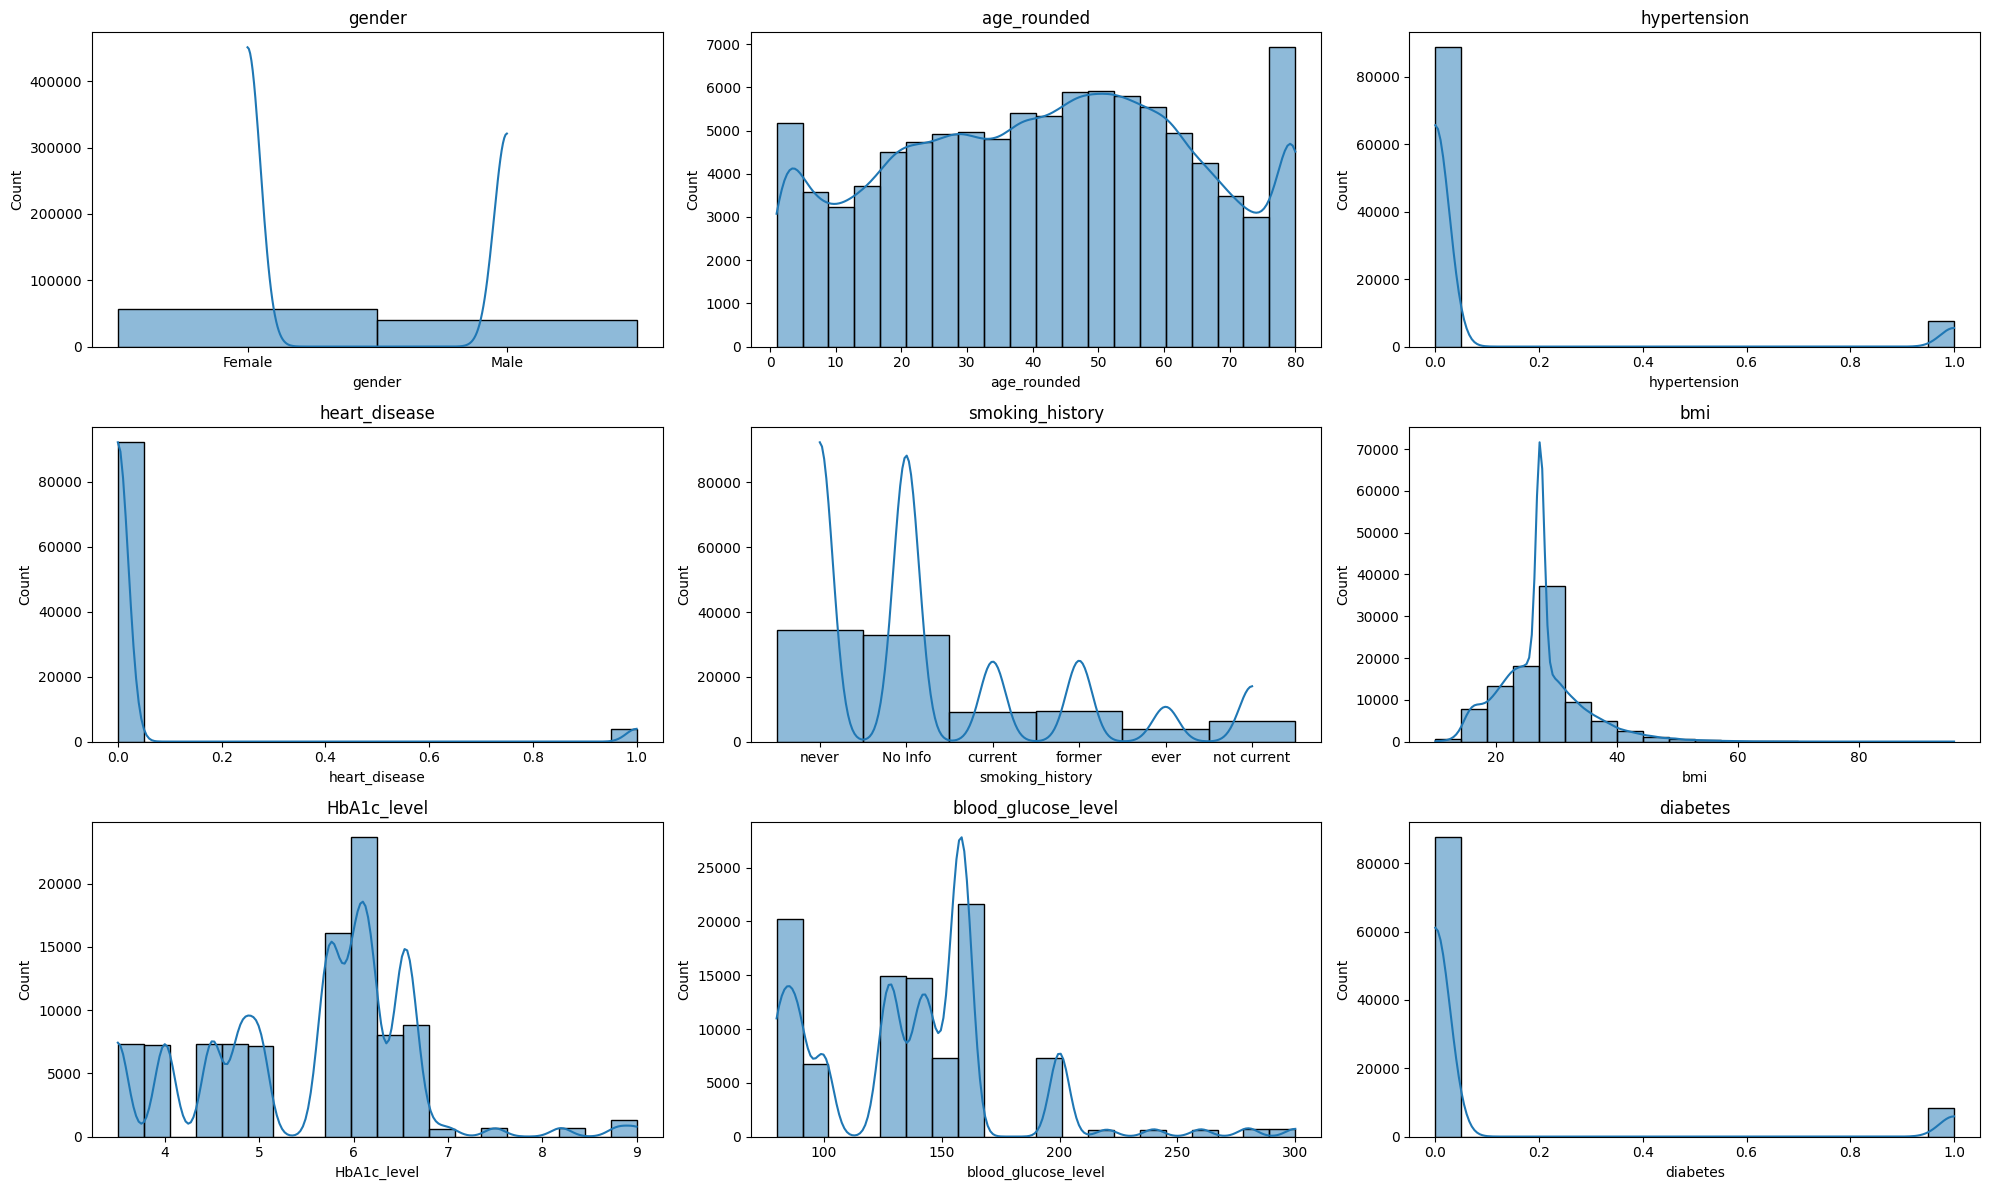

In [19]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

In [20]:
gender_mapping = {'Female': 0, 'Male': 1}
smokin_mapping = {'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5}

df['gender'] = df['gender'].replace(gender_mapping)
df['smoking_history'] = df['smoking_history'].replace(smokin_mapping)

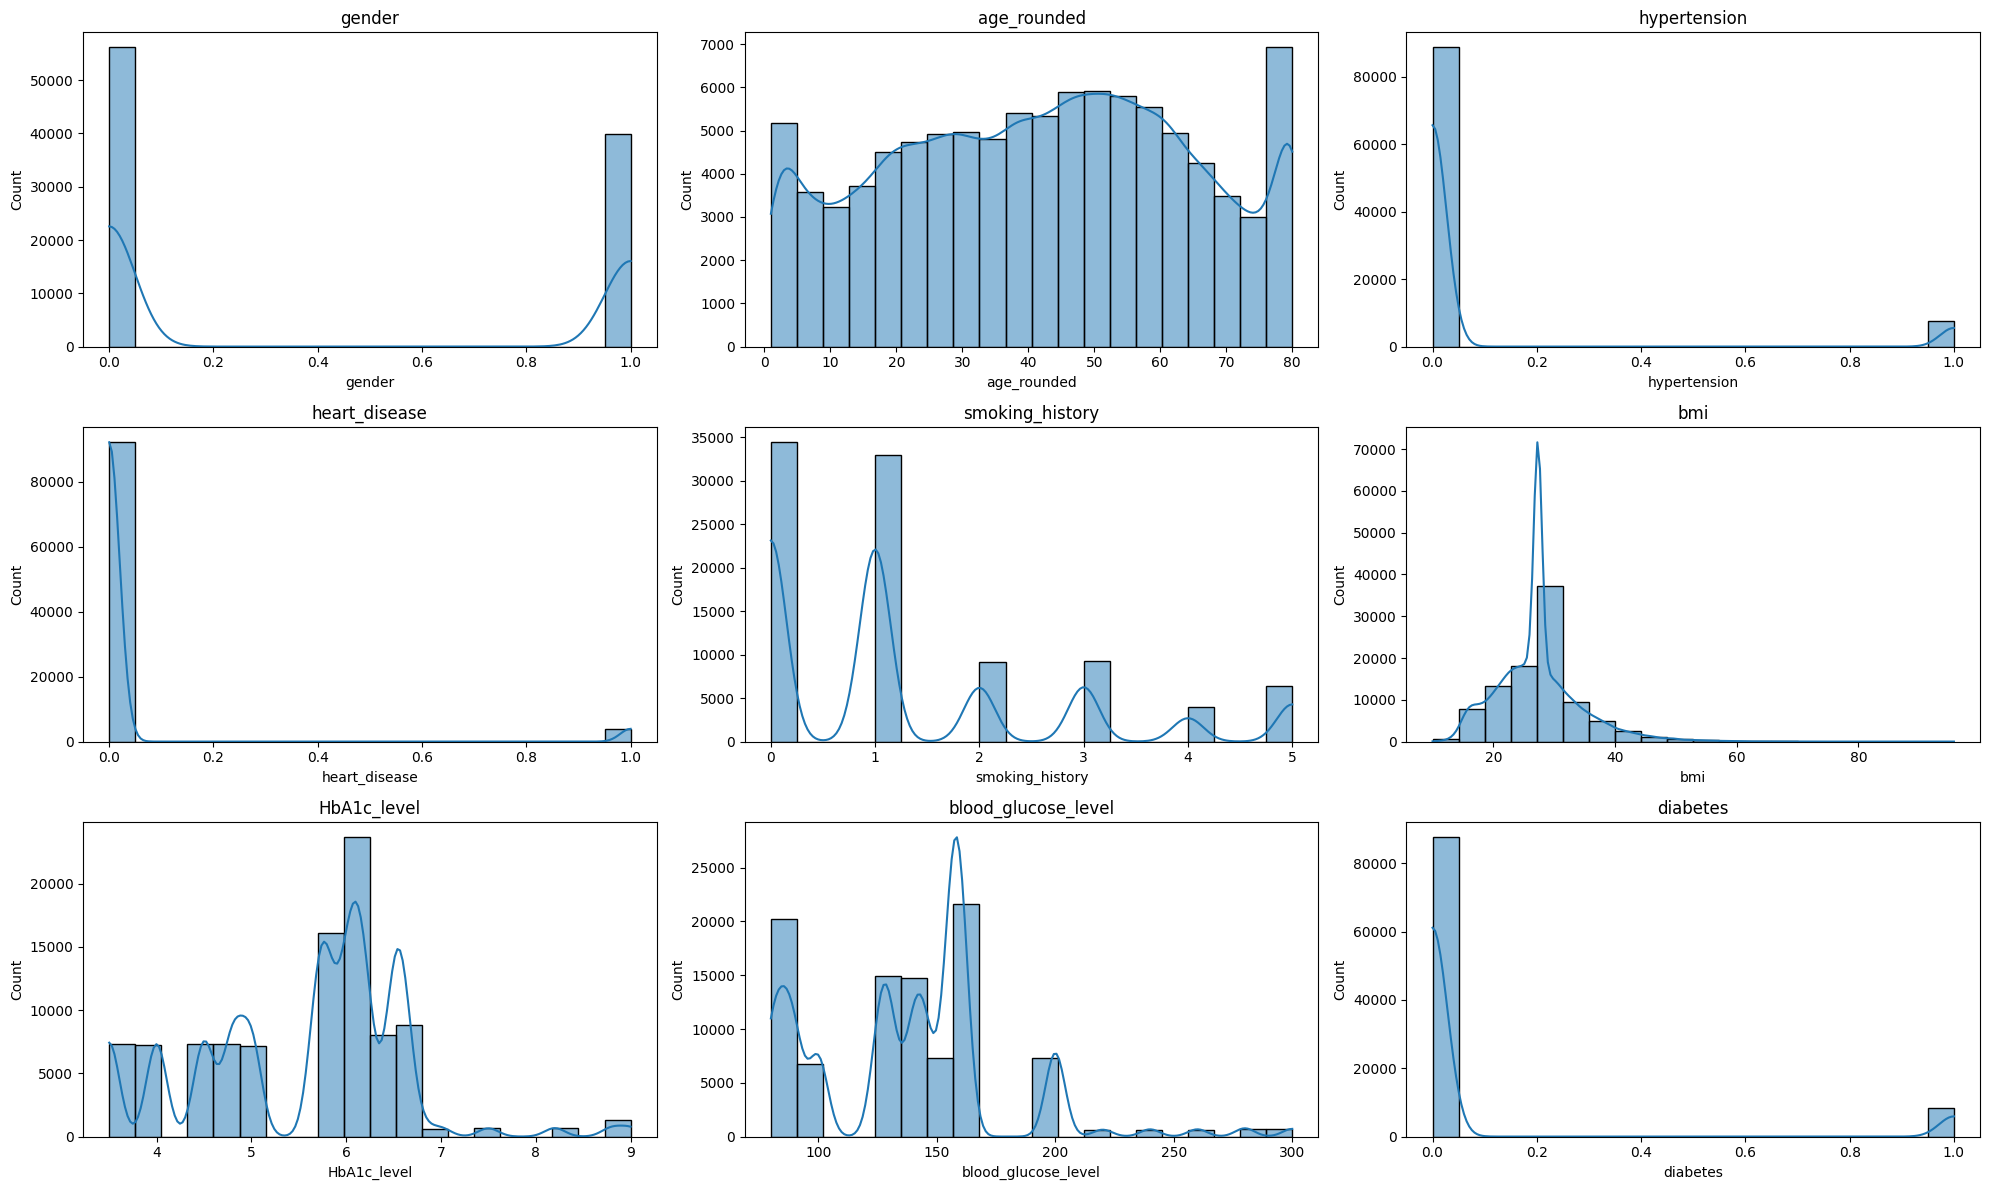

In [21]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

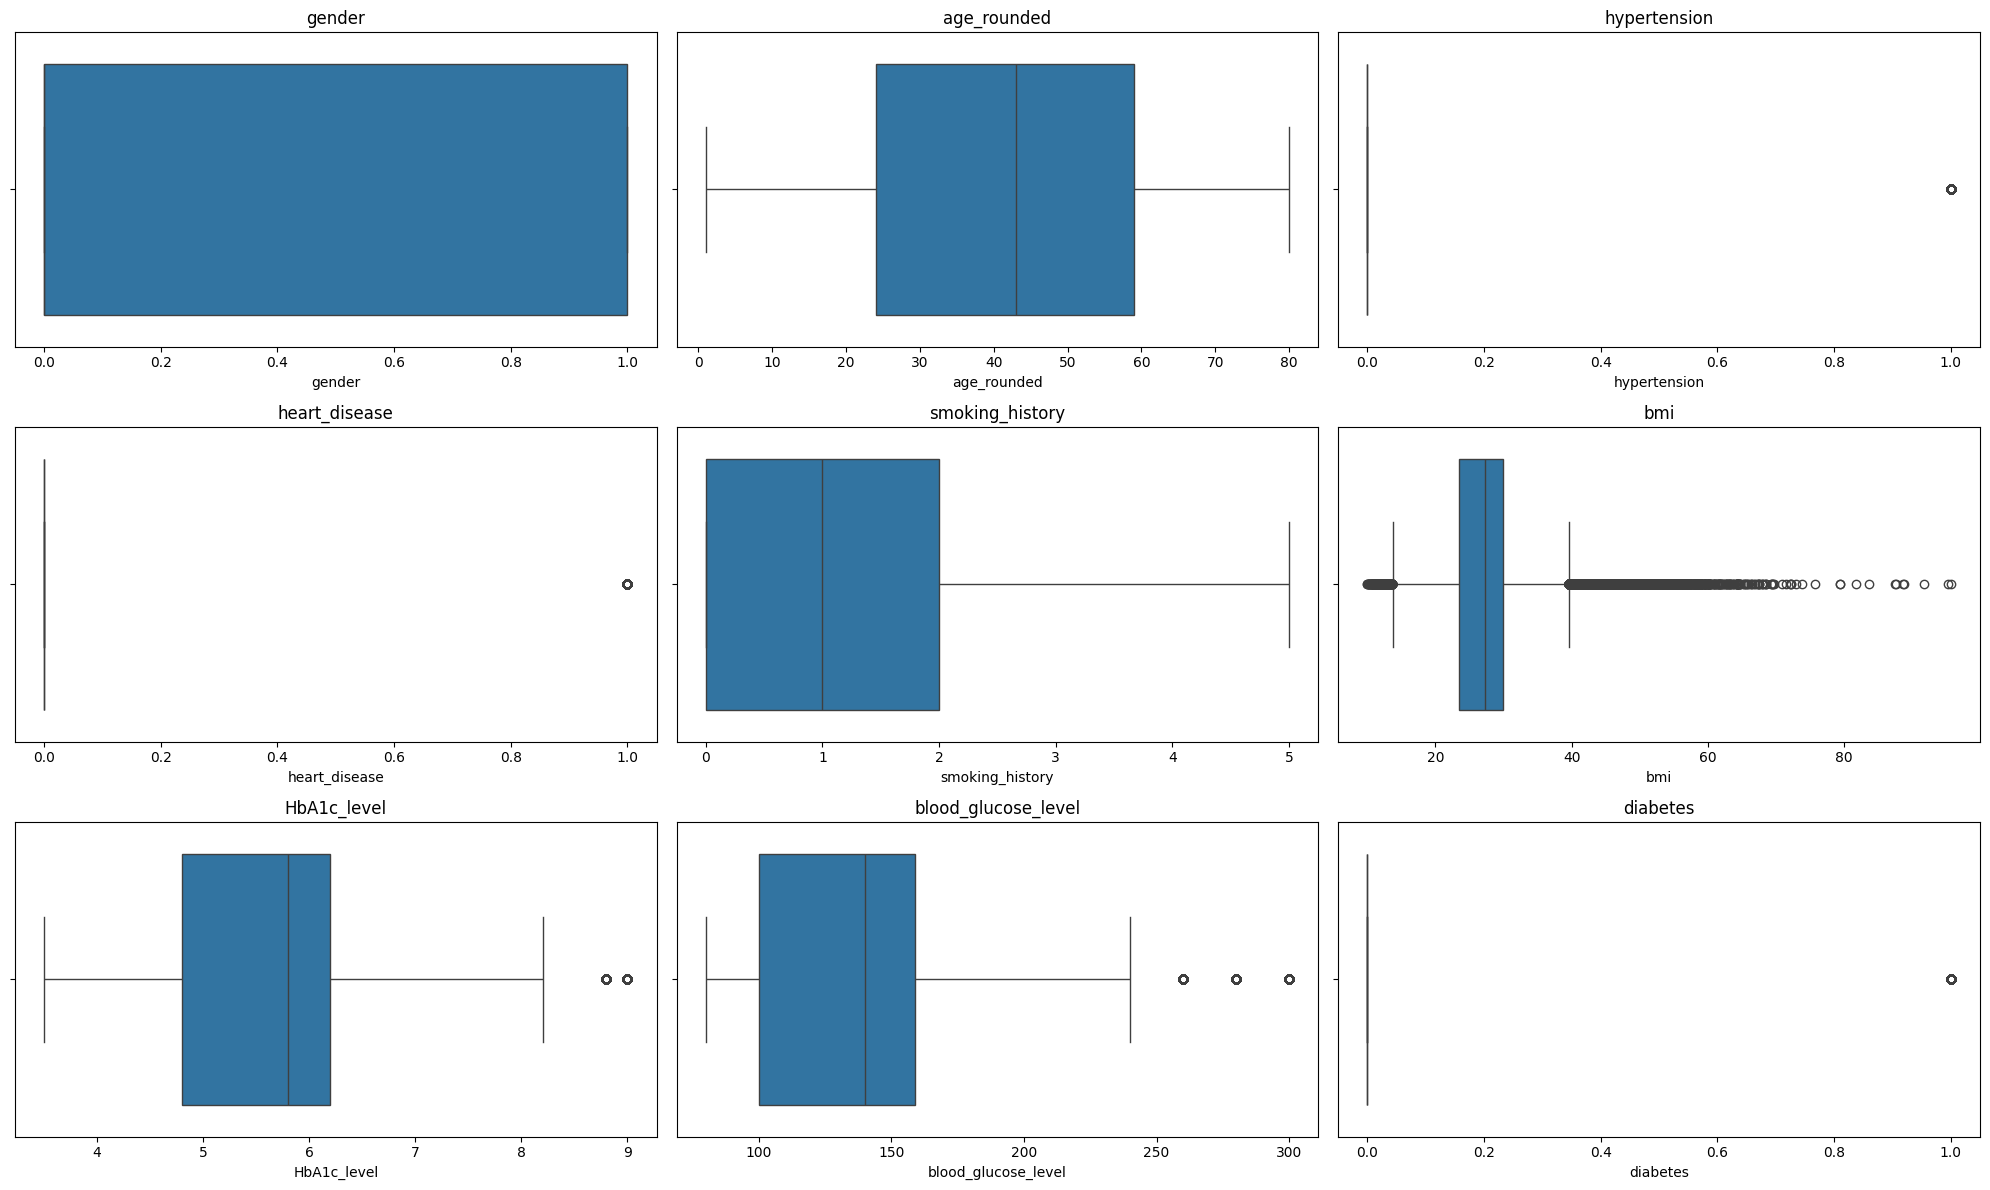

In [22]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Outlier Removal

In [23]:
def remove_outliers(df, columns):
  df_filtered = df.copy()

  for column in columns:
      # Calculate the first and third quartiles (Q1 and Q3)
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)

      # Calculate the IQR (Interquartile Range)
      iqr = q3 - q1

      # Define the lower and upper bounds for outliers
      lower_bound = (q1 - 1.5 * iqr)
      upper_bound = (q3 + 1.5 * iqr)

      # if(lower_bound < 0):
      #   lower_bound = 0

      # print(q1, q3, iqr)
      # print(column, lower_bound, upper_bound)

      df_filtered = df_filtered[df_filtered[column]<upper_bound]
      df_filtered = df_filtered[df_filtered[column]>lower_bound]

  return df_filtered

In [ ]:
rmv_outlier_df = remove_outliers(df, columns=['bmi', 'HbA1c_level', 'blood_glucose_level'])

In [25]:
rmv_outlier_df.shape

(88172, 9)

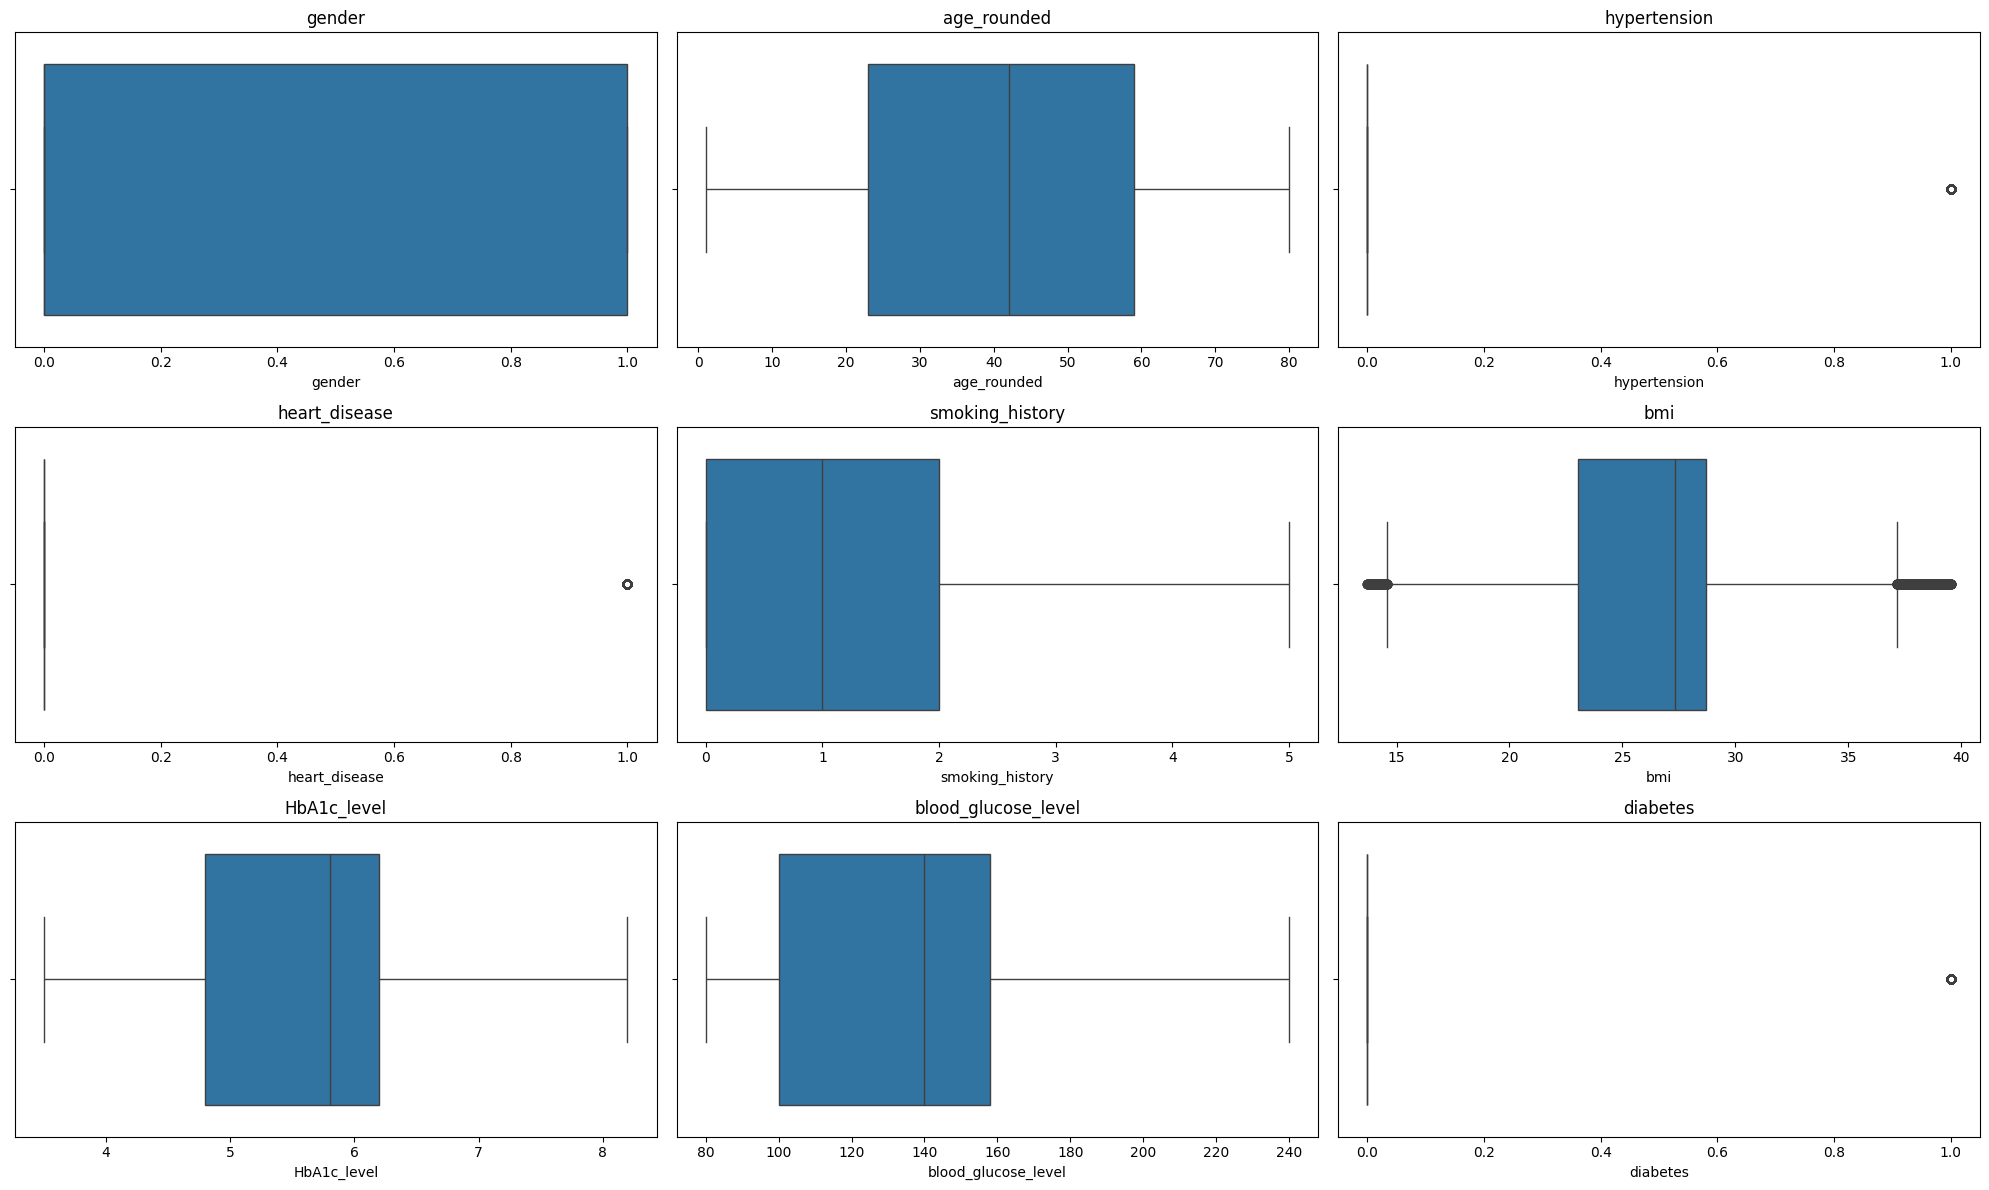

In [26]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(rmv_outlier_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=rmv_outlier_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Data Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

normalization_df = rmv_outlier_df.copy()
print(normalization_df.shape)

columns_to_normalize = ['bmi', 'HbA1c_level', 'blood_glucose_level', 'age_rounded']
scaler = MinMaxScaler()
# scaler = StandardScaler()
normalization_df[columns_to_normalize] = scaler.fit_transform(normalization_df[columns_to_normalize])

(88172, 9)


In [32]:
normalization_df.shape

(88172, 9)

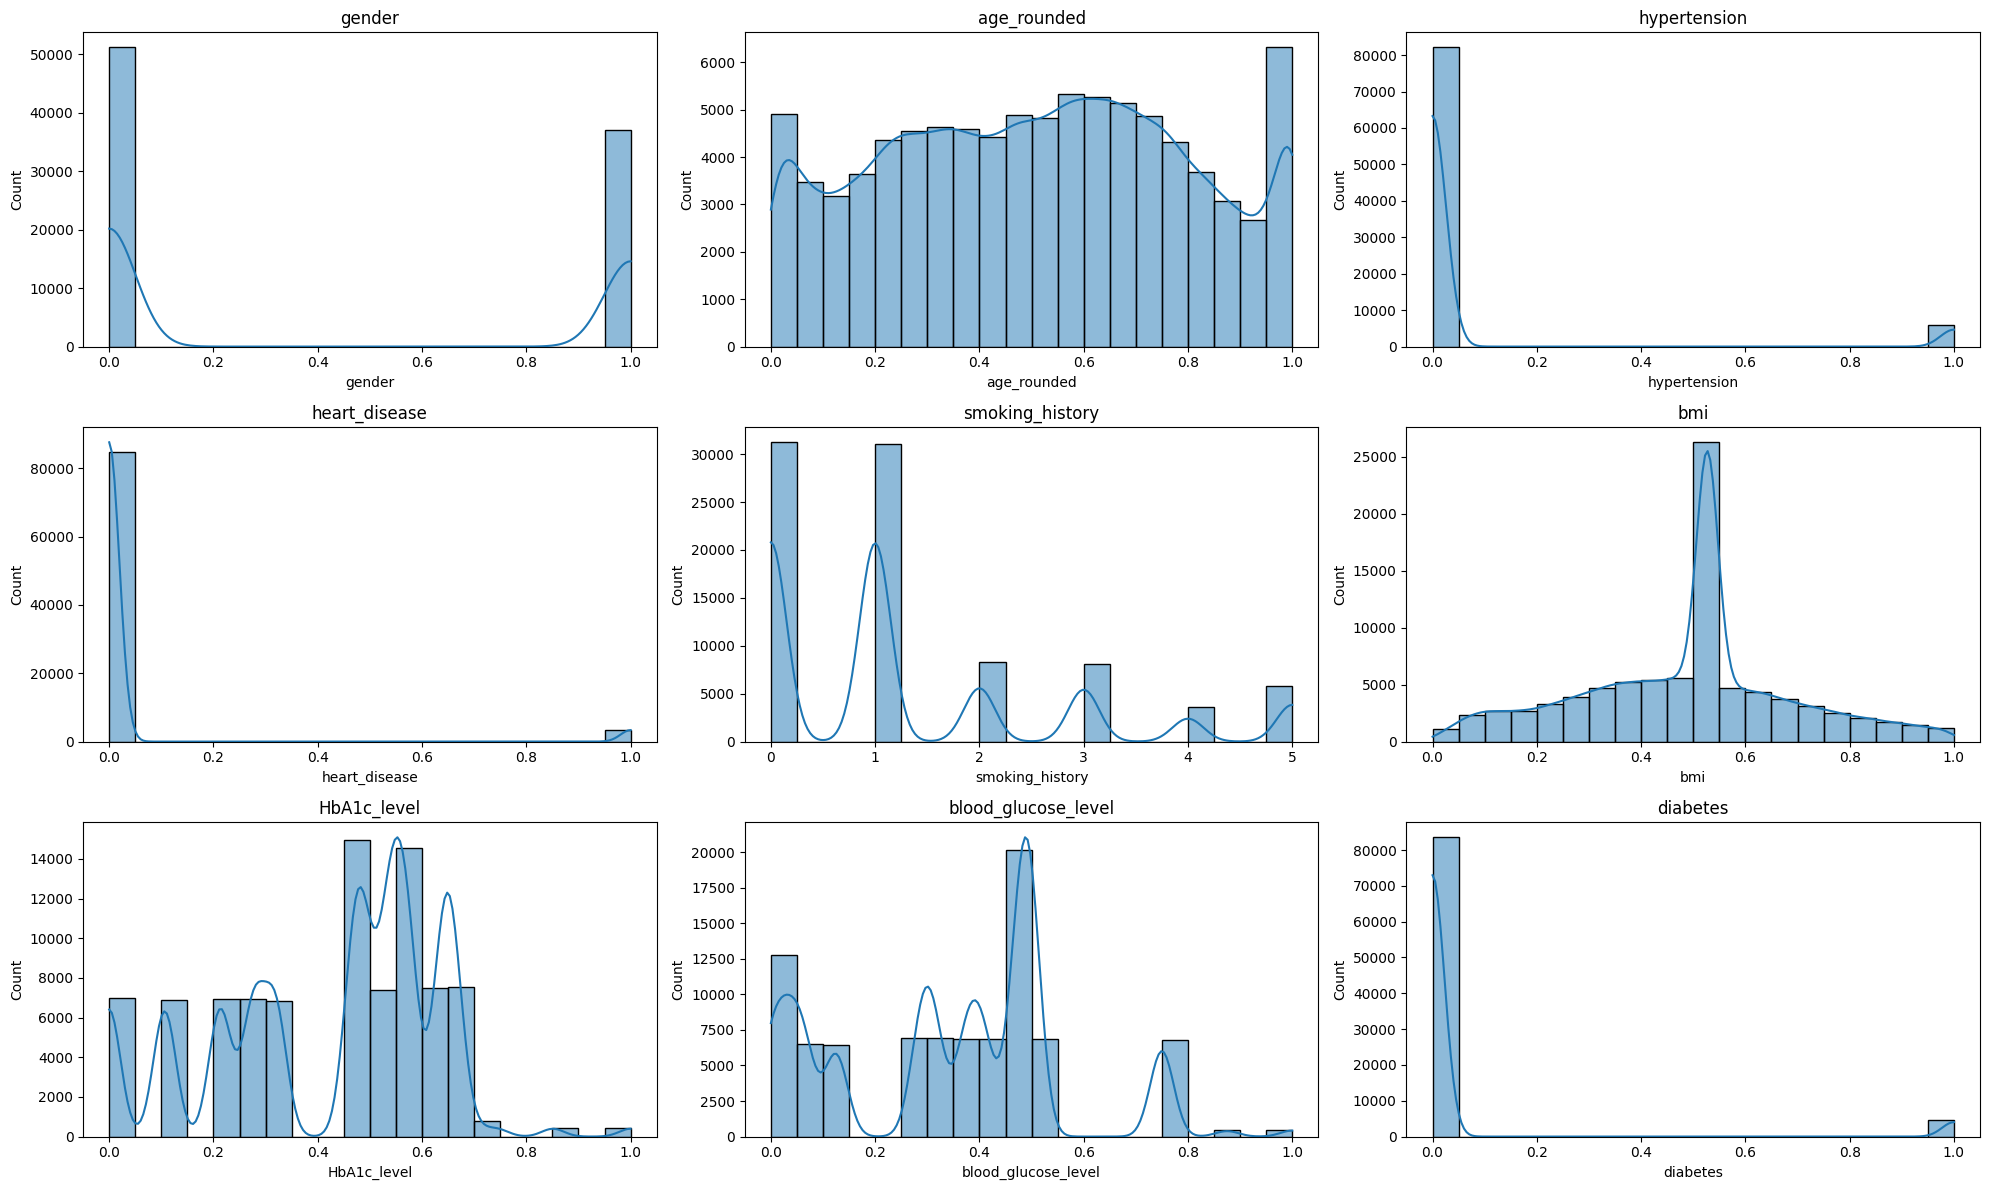

In [33]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(normalization_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(normalization_df[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

# Feature Selection

#### Correlation

In [34]:
import seaborn as sns

def plot_confusionMatrix(data):
  sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
  ax = plt.figure(figsize=(10, 8))                            #set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
  plt.title("Correlation Matrix of all features")
  sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
              vmax=1.0,                                       #Values to anchor the colormap, otherwise they are inferred from
                                                              #the data and other keyword arguments.
              vmin=0.0,
              linewidths=0.01,
              square=False,                                   #If True, set the Axes aspect to “equal” so each cell will be square-shaped.
              annot=True,                                     #If True, write the data value in each cell.
              linecolor="black")                              #Color of the lines that will divide each cell.
                                                              #https://seaborn.pydata.org/generated/seaborn.heatmap.html
  b, t = plt.ylim()                                           # discover the values for bottom and top
  b += 0.5                                                    # Add 0.5 to the bottom
  t -= 0.5                                                    # Subtract 0.5 from the top
  plt.ylim(b, t)                                              # update the ylim(bottom, top) values
  plt.show()

In [ ]:
plt.figure(figsize=(20, 12))

for i, column in enumerate(normalization_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(normalization_df[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

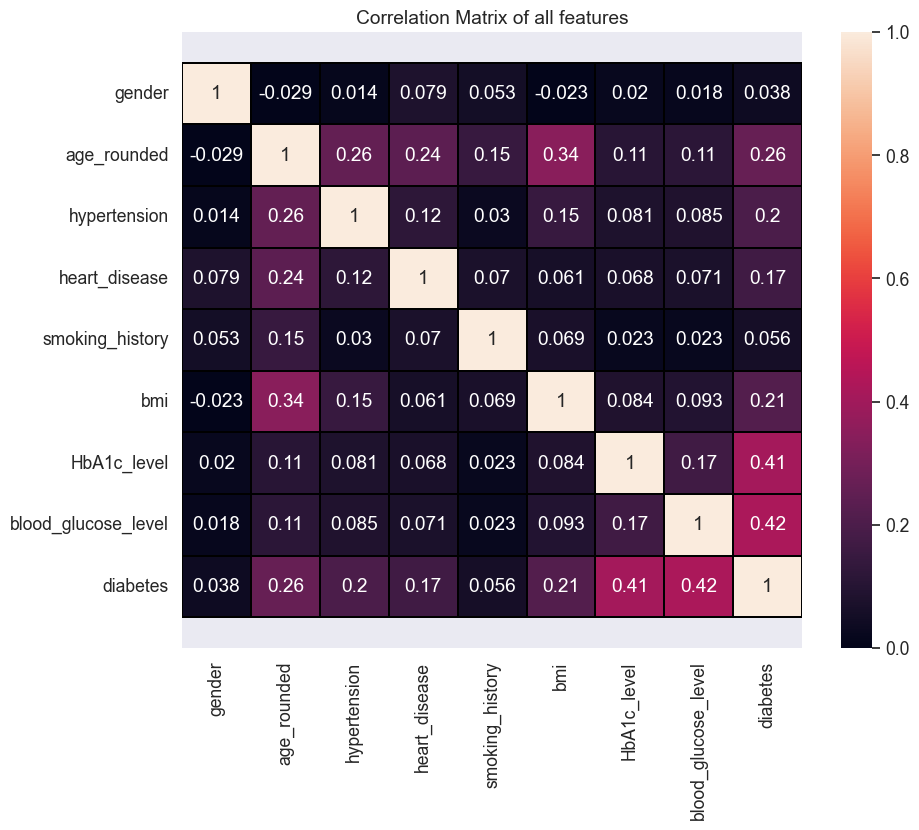

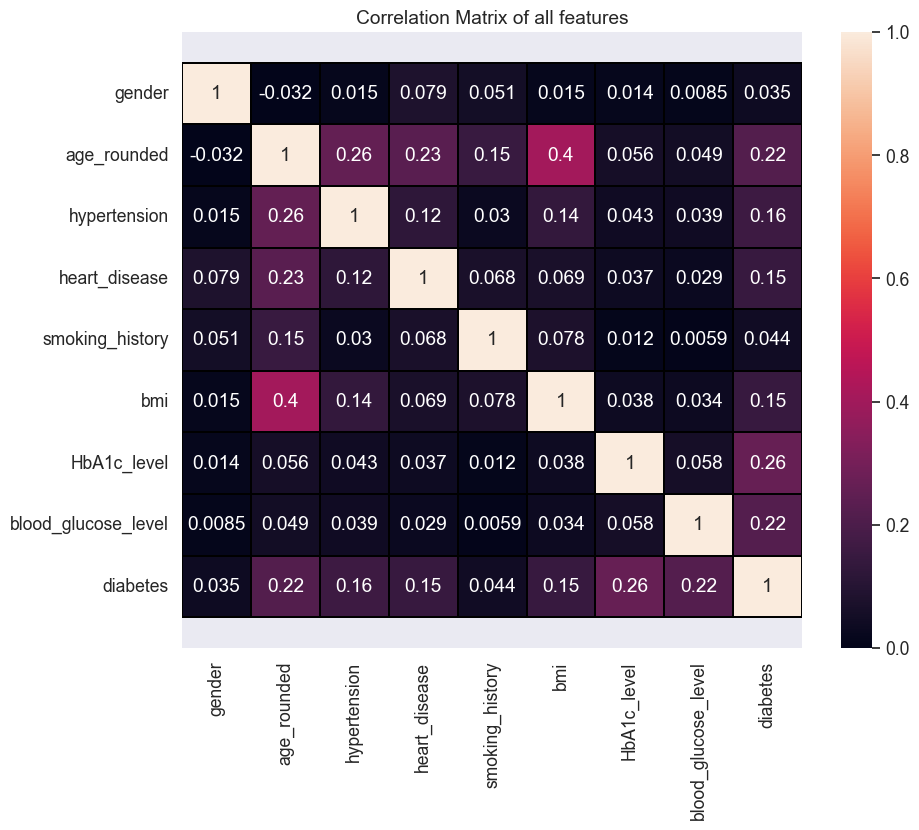

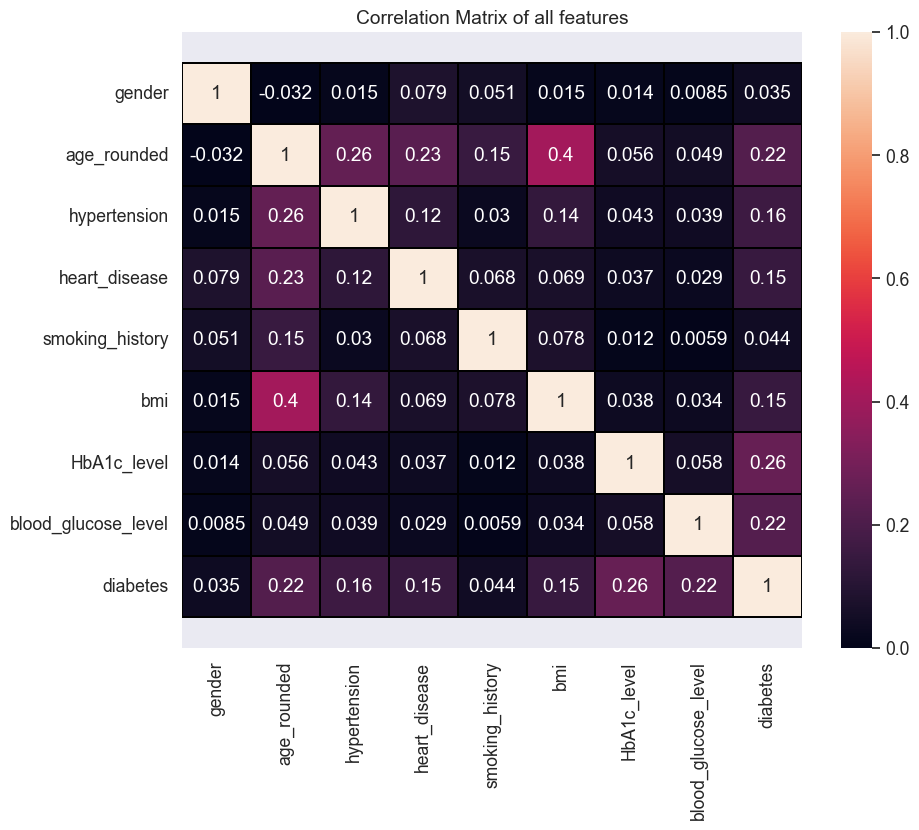

In [35]:
plot_confusionMatrix(df)
plot_confusionMatrix(rmv_outlier_df)
plot_confusionMatrix(normalization_df)

In [49]:
regular_corr_list = df.corr()
rmv_out_corr_list = rmv_outlier_df.corr()
normali_corr_list = normalization_df.corr()

regular_corr_list = regular_corr_list.sort_values(by='diabetes', ascending=False)
rmv_out_corr_list = rmv_out_corr_list.sort_values(by='diabetes', ascending=False)
normali_corr_list = normali_corr_list.sort_values(by='diabetes', ascending=False)

print(f'Correlation List for original:')
print(regular_corr_list['diabetes'])
print(f'Correlation List for after outlier removal:')
print(rmv_out_corr_list['diabetes'])
print(f'Correlation List for after normalization:')
print(normali_corr_list['diabetes'])

Correlation List for original:
diabetes               1.000000
blood_glucose_level    0.424366
HbA1c_level            0.406446
age_rounded            0.264995
bmi                    0.214951
hypertension           0.195696
heart_disease          0.170701
smoking_history        0.055940
gender                 0.037837
Name: diabetes, dtype: float64
Correlation List for after outlier removal:
diabetes               1.000000
HbA1c_level            0.264280
blood_glucose_level    0.218836
age_rounded            0.215953
hypertension           0.161884
bmi                    0.146608
heart_disease          0.145797
smoking_history        0.043740
gender                 0.035454
Name: diabetes, dtype: float64
Correlation List for after normalization:
diabetes               1.000000
HbA1c_level            0.264280
blood_glucose_level    0.218836
age_rounded            0.215953
hypertension           0.161884
bmi                    0.146608
heart_disease          0.145797
smoking_history      

In [50]:
regular_corr_list = regular_corr_list['diabetes'].index.tolist()
rmv_out_corr_list = rmv_out_corr_list['diabetes'].index.tolist()
normali_corr_list = normali_corr_list['diabetes'].index.tolist()

print(regular_corr_list)
print(rmv_out_corr_list)
print(normali_corr_list)

['diabetes', 'blood_glucose_level', 'HbA1c_level', 'age_rounded', 'bmi', 'hypertension', 'heart_disease', 'smoking_history', 'gender']
['diabetes', 'HbA1c_level', 'blood_glucose_level', 'age_rounded', 'hypertension', 'bmi', 'heart_disease', 'smoking_history', 'gender']
['diabetes', 'HbA1c_level', 'blood_glucose_level', 'age_rounded', 'hypertension', 'bmi', 'heart_disease', 'smoking_history', 'gender']


In [51]:
# Original Data (0)
regular_corr = df.loc[:, ~df.columns.isin(['heart_disease', 'smoking_history', 'gender'])]
# Data after outlier removal (0,1)
rmv_out_corr = rmv_outlier_df.loc[:, ~rmv_outlier_df.columns.isin(['heart_disease', 'smoking_history', 'gender'])]
# Data after normalization (0,1,2,3)
normali_corr = normalization_df.loc[:, ~normalization_df.columns.isin(['heart_disease', 'smoking_history', 'gender'])]

In [52]:
print(regular_corr.shape)
print(rmv_out_corr.shape)
print(normali_corr.shape)

(96128, 6)
(88172, 6)
(88172, 6)


In [53]:
regular_corr.to_csv('./dataset/regular_corr.csv')
rmv_out_corr.to_csv('./dataset/rmv_out_corr.csv')
normali_corr.to_csv('./dataset/normali_corr.csv')

# Classification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
a_file_path = './Correlation/regular_corr.csv'
b_file_path = './Correlation/rmv_out_corr.csv'
c_file_path = './Correlation/normali_corr.csv'

a_df = pd.read_csv(a_file_path)
b_df = pd.read_csv(b_file_path)
c_df = pd.read_csv(c_file_path)

In [ ]:
# Train Test Split
a_X = a_df.drop('diabetes', axis=1)
a_y = a_df['diabetes']
b_X = b_df.drop('diabetes', axis=1)
b_y = b_df['diabetes']
c_X = c_df.drop('diabetes', axis=1)
c_y = c_df['diabetes']

a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X, a_y, test_size=0.2, random_state=1)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.2, random_state=1)
c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(c_X, c_y, test_size=0.2, random_state=1)

### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

#### Regular dataset

In [ ]:
a_knn_model = knn()
a_knn_model.fit(a_X_train, a_y_train)

print(f'>> done fitting')

# Uncomment below if you want to see the list of available hyperparameters
# parameter = a_knn_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
a_knn_grid_search = GridSearchCV(knn(), param_grid, cv=5)
a_knn_grid_search.fit(a_X_train, a_y_train)
a_knn_best_params = a_knn_grid_search.best_params_

print(f'Regular Dataset best param : {a_knn_best_params}')

a_knn_best_model = knn(**a_knn_best_params)
a_knn_best_model.fit(a_X_train, a_y_train)
a_y_knn_pred = a_knn_best_model.predict(a_X_test)

print(f'Regular Dataset accuracy : {accuracy_score(a_y_test, a_y_knn_pred)}')
print(f'Regular Dataset classification report : {classification_report(a_y_test, a_y_knn_pred)}')
print(f'Regular Dataset confusion matrix : {confusion_matrix(a_y_test, a_y_knn_pred)}')

#### Dataset with Outlier Removal

In [ ]:
b_knn_model = knn()
b_knn_model.fit(b_X_train, b_y_train)

print(f'>> done fitting')

# Uncomment if you want to see the list of available hyperparameters
# parameter = b_knn_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
b_knn_grid_search = GridSearchCV(knn(), param_grid, cv=5)
b_knn_grid_search.fit(b_X_train, b_y_train)
b_knn_best_params = b_knn_grid_search.best_params_

print(f'Dataset with Outlier Removal best param : {b_knn_best_params}')

b_knn_best_model = knn(**b_knn_best_params)
b_knn_best_model.fit(b_X_train, b_y_train)
b_y_knn_pred = b_knn_best_model.predict(b_X_test)

print(f'Regular Dataset accuracy : {accuracy_score(b_y_test, b_y_knn_pred)}')
print(f'Regular Dataset classification report : {classification_report(b_y_test, b_y_knn_pred)}')
print(f'Regular Dataset confusion matrix : {confusion_matrix(b_y_test, b_y_knn_pred)}')

#### Dataset with Normalization

In [ ]:
c_knn_model = knn()
c_knn_model.fit(c_X_train, c_y_train)

print(f'>> done fitting')

# Uncomment if you want to see the list of available hyperparameters
# parameter = c_knn_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
c_knn_grid_search = GridSearchCV(knn(), param_grid, cv=5)
c_knn_grid_search.fit(c_X_train, c_y_train)
c_knn_best_params = c_knn_grid_search.best_params_

print(f'Dataset with Normalization best param : {c_knn_best_params}')

c_knn_best_model = knn(**c_knn_best_params)
c_knn_best_model.fit(c_X_train, c_y_train)
c_y_knn_pred = c_knn_best_model.predict(c_X_test)

print(f'Regular Dataset accuracy : {accuracy_score(c_y_test, c_y_knn_pred)}')
print(f'Regular Dataset classification report : {classification_report(c_y_test, c_y_knn_pred)}')
print(f'Regular Dataset confusion matrix : {confusion_matrix(c_y_test, c_y_knn_pred)}')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Regular Dataset

In [ ]:
a_rf_model = RandomForestClassifier(random_state=42)
a_rf_model.fit(a_X_train, a_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = a_rf_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
a_rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
a_rf_grid_search.fit(a_X_train, a_y_train)
a_rf_best_params = a_rf_grid_search.best_params_

print(f'Regular Dataset best param : {a_rf_best_params}')

a_rf_best_model = RandomForestClassifier(**a_rf_best_params)
a_rf_best_model.fit(a_X_train, a_y_train)
a_y_rf_pred = a_rf_best_model.predict(a_X_test)

print(f'Regular Dataset accuracy : {accuracy_score(a_y_test, a_y_rf_pred)}')
print(f'Regular Dataset classification report : {classification_report(a_y_test, a_y_rf_pred)}')
print(f'Regular Dataset confusion matrix : {confusion_matrix(a_y_test, a_y_rf_pred)}')

#### Dataset with Outlier Removal

In [ ]:
b_rf_model = RandomForestClassifier(random_state=42)
b_rf_model.fit(b_X_train, b_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = b_rf_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
b_rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
b_rf_grid_search.fit(b_X_train, b_y_train)
b_rf_best_params = b_rf_grid_search.best_params_

print(f'Dataset with Outlier Removal best param : {b_rf_best_params}')

b_rf_best_model = RandomForestClassifier(**b_rf_best_params)
b_rf_best_model.fit(b_X_train, b_y_train)
b_y_rf_pred = b_rf_best_model.predict(b_X_test)

print(f'Dataset with Outlier Removal accuracy : {accuracy_score(b_y_test, b_y_rf_pred)}')
print(f'Dataset with Outlier Removal classification report : {classification_report(b_y_test, b_y_rf_pred)}')
print(f'Dataset with Outlier Removal confusion matrix : {confusion_matrix(b_y_test, b_y_rf_pred)}')

#### Dataset with Normalization

In [ ]:
c_rf_model = RandomForestClassifier(random_state=42)
c_rf_model.fit(c_X_train, c_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = c_rf_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
c_rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
c_rf_grid_search.fit(c_X_train, c_y_train)
c_rf_best_params = c_rf_grid_search.best_params_

print(f'Regular best param : {c_rf_best_params}')

c_rf_best_model = RandomForestClassifier(**c_rf_best_params)
c_rf_best_model.fit(c_X_train, c_y_train)
c_y_rf_pred = c_rf_best_model.predict(c_X_test)

print(f'Dataset with Normalization accuracy : {accuracy_score(c_y_test, c_y_rf_pred)}')
print(f'Dataset with Normalization classification report : {classification_report(c_y_test, c_y_rf_pred)}')
print(f'Dataset with Normalization confusion matrix : {confusion_matrix(c_y_test, c_y_rf_pred)}')

### XGBoost

In [ ]:
from xgboost import XGBClassifier

#### Regular Dataset

In [ ]:
a_xgb_model = XGBClassifier(random_state=1)
a_xgb_model.fit(a_X_train, a_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = a_xgb_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
a_xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
a_xgb_grid_search.fit(a_X_train, a_y_train)
a_xgb_best_params = a_xgb_grid_search.best_params_

print(f'Regular best param : {a_xgb_best_params}')

a_xgb_best_model = XGBClassifier(**a_xgb_best_params)
a_xgb_best_model.fit(a_X_train, a_y_train)
a_y_xgb_pred = a_xgb_best_model.predict(a_X_test)

print(f'Regular Dataset accuracy : {accuracy_score(a_y_test, a_y_xgb_pred)}')
print(f'Regular Dataset classification report : {classification_report(a_y_test, a_y_xgb_pred)}')
print(f'Regular Dataset confusion matrix : {confusion_matrix(a_y_test, a_y_xgb_pred)}')

#### Dataset with Outlier Removal

In [ ]:
b_xgb_model = XGBClassifier(random_state=1)
b_xgb_model.fit(b_X_train, b_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = b_xgb_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
b_xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
b_xgb_grid_search.fit(b_X_train, b_y_train)
b_xgb_best_params = b_xgb_grid_search.best_params_

print(f'Remove Outlier best param : {b_xgb_best_params}')

b_xgb_best_model = XGBClassifier(**b_xgb_best_params)
b_xgb_best_model.fit(b_X_train, b_y_train)
b_y_xgb_pred = b_xgb_best_model.predict(b_X_test)

print(f'Dataset with Outlier Removal accuracy : {accuracy_score(b_y_test, b_y_xgb_pred)}')
print(f'Dataset with Outlier Removal classification report : {classification_report(b_y_test, b_y_xgb_pred)}')
print(f'Dataset with Outlier Removal confusion matrix : {confusion_matrix(b_y_test, b_y_xgb_pred)}')

#### Dataset with Normalization

In [ ]:
# Regular
c_xgb_model = XGBClassifier(random_state=1)
c_xgb_model.fit(c_X_train, c_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = c_xgb_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
c_xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
c_xgb_grid_search.fit(c_X_train, c_y_train)
c_xgb_best_params = c_xgb_grid_search.best_params_

print(f'Normalization best param : {c_xgb_best_params}')

c_xgb_best_model = XGBClassifier(**c_xgb_best_params)
c_xgb_best_model.fit(c_X_train, c_y_train)
c_y_xgb_pred = c_xgb_best_model.predict(c_X_test)

print(f'Dataset with Normalization accuracy : {accuracy_score(c_y_test, c_y_xgb_pred)}')
print(f'Dataset with Normalization classification report : {classification_report(c_y_test, c_y_xgb_pred)}')
print(f'Dataset with Normalization confusion matrix : {confusion_matrix(c_y_test, c_y_xgb_pred)}')